In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp, log
import pandas as pd
import matplotlib as mpl
from pathlib import Path
from mpl_toolkits.axes_grid1 import make_axes_locatable
from floquet_simulations.plot_functions import PlotParams
from matplotlib.colors import LinearSegmentedColormap
from floquet_simulations.hamiltonians import ConvertComplex
PlotParams(fontsize=10)

def unique(a):
    unique, counts = np.unique(a, return_counts=True)
    return np.asarray((unique, counts)).T

def FloatToStringSave(a):
    return str(a).replace(".", "p")

In [2]:
# dfO = pd.read_csv("D:Data/Set21-alpha=1,beta=2,omega=8,local/"+"data_3.csv",
#                            index_col=False)
# df_dir = Path().absolute().parent.parent/"paper_data"/"data_3.csv"
# df_dir = Path().absolute().parent.parent/"paper_data"/"Heff_omega=8,alpha=1,beta=2,phi3=0.csv"
df_dir = Path().absolute().parent.parent.parent/"paper_data"/"Heff_omega=8,alpha=1,beta=2,phi3=0,newvals.csv"
dfO = pd.read_csv(df_dir, index_col=False, 
                        converters={"FT-J12": ConvertComplex,
                                  "FT-J23": ConvertComplex,
                                  "FT-J31": ConvertComplex})
# dfO = pd.read_csv("D:/Data/Merges/alpha=1,beta=2,omega=8,0-40/FT/FT-Min,phi3=0.csv",
#                   index_col=False)
# dfP0 = pd.read_csv("D:/Data/Set12-alpha=1,beta=2,omega=8/Summaries/FT-ABS-phi3=0.csv", 
#                     index_col = False)
dfO = dfO.sort_values(by=['A3', 'A2'], ignore_index=True)

A2_min = 0
A2_max = 18.5
A2_range = int((A2_max - A2_min)*100 +1)
A3_min = 37
A3_max = 38.5
A3_range = int((A3_max - A3_min)*100 +1)
# domains
dfP = dfO[
           (dfO.A3 <=A3_max)
           &(dfO.A3 >= A3_min)
           &(dfO.A2 <=A2_max)
           &(dfO.A2 >=A2_min)
          ]

dfP = dfP.sort_values(by=['A3', 'A2'], ignore_index=True)

In [3]:
#%%
"""plot raw hopping"""
J12 = np.abs(np.array(dfP["FT-J12"].to_list()))
J23 = np.abs(np.array(dfP["FT-J23"].to_list()))
J31 = np.abs(np.array(dfP["FT-J31"].to_list()))
X_flat = J23 / J12
Y_flat = J31 / J12
A2_flat = np.array(dfP.A2.to_list())
A3_flat = np.array(dfP.A3.to_list())

# remove off diagonal parts
X_flat = np.where(X_flat>Y_flat, X_flat, np.nan)
Y_flat = np.where(X_flat>Y_flat, Y_flat, np.nan)

#remove parts outside the triangl
X_flat = np.where(X_flat<=1, X_flat, np.nan)
Y_flat =np.where(X_flat<=1, Y_flat, np.nan)

In [4]:
def _inverse(x):
    return x**(1. / 10)


def _forward(x):
    return x**10

norm = mpl.colors.FuncNorm((_forward, _inverse), vmin=0, vmax=18.5)

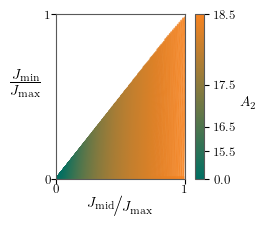

In [7]:
fontsize=10
PlotParams(fontsize=fontsize)

colour_flat = A2_flat

colour_flat = np.where(colour_flat ==0, colour_flat+1e-9, colour_flat )
minn, maxx = colour_flat.min(), colour_flat.max()
# norm = mpl.colors.Normalize(minn, maxx)
# norm = mpl.colors.LogNorm(vmin=minn+1e-9, vmax=maxx)
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', '#F78320'], N=256)
# m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
# m.set_array([])
# fcolors = m.to_rgba(color_dimension)

figsize=(7,6)
cm_unit = 1/2.54
# plot
fig, ax = plt.subplots(figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit), tight_layout=True)
ax.scatter(X_flat, Y_flat, c=colour_flat, s = 0.2, alpha=1, norm=norm, cmap=cmap)

ax.set_xlabel(r'$\nicefrac{J_{\mathrm{med}}}{J_{\mathrm{max}}}$', labelpad = 0.00000001, rotation=0, fontsize=1.5)
ax.set_ylabel(r'$\nicefrac{J_{\mathrm{min}}}{J_{\mathrm{max}}}$', labelpad = 2, rotation = 0, fontsize=1.5)
ax.tick_params(axis="x", pad = 0.001)
ax.tick_params(axis="y", pad = 0.001)

ax.set_xticks([0,1], labels=["0", r"$1$"])
ax.set_yticks([0,1], labels=["0", r"$1$"])

ax.set_xlim((0,1))
ax.set_ylim((0,1))


ax.set_xlabel(r'$\nicefrac{J_{\mathrm{mid}}}{J_{\mathrm{max}}}$', labelpad = 0.0001, rotation=0, fontsize=fontsize*1.5)
ax.set_ylabel(r'$\frac{J_{\mathrm{min}}}{J_{\mathrm{max}}}$', labelpad = 14, rotation = 0, fontsize=fontsize*1.5)

colourbar_pad = 0.1; colourbar_size_percentage=7
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=f"{colourbar_size_percentage}%", pad=colourbar_pad)
# ticks = np.concatenate((np.array([0]), exp(log(np.linspace(1/3, 1, 3))/10)*18.5), axis=None)
ticks = np.array([0, 15.5, 16.5, 17.5, 18.5])
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, ticks=ticks)
cbar.ax.set_yticklabels([f"{ti:.1f}" for ti in ticks])
cbar.ax.set_ylabel(r"$A_2$", rotation=0, labelpad=8)
fig.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_paper"/"2d_tunnelling_cover_2alpha=beta_A2.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [ ]:
fontsize=10
PlotParams(fontsize=fontsize)

# remove off diagonal parts
X_flat = np.where(X_flat>=Y_flat, X_flat, np.nan)
Y_flat = np.where(X_flat>=Y_flat, Y_flat, np.nan)

#remove parts outside the triangl
X_flat = np.where(X_flat<=1, X_flat, np.nan)
Y_flat =np.where(X_flat<=1, Y_flat, np.nan)

colour_flat = A3_flat

minn, maxx = colour_flat.min(), colour_flat.max()
norm = mpl.colors.Normalize(minn, maxx)
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', '#F78320'], N=256)
# m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
# m.set_array([])
# fcolors = m.to_rgba(color_dimension)

figsize=(7,6)
cm_unit = 1/2.54
# plot
fig, ax = plt.subplots(figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit), tight_layout=True)
ax.scatter(X_flat, Y_flat, c=colour_flat, s = 0.3, alpha=1, norm=norm, cmap=cmap)

ax.set_xlabel(r'$\nicefrac{J_{\mathrm{med}}}{J_{\mathrm{max}}}$', labelpad = 0.00000001, rotation=0, fontsize=1.5)
ax.set_ylabel(r'$\nicefrac{J_{\mathrm{min}}}{J_{\mathrm{max}}}$', labelpad = 2, rotation = 0, fontsize=1.5)
ax.tick_params(axis="x", pad = 0.001)
ax.tick_params(axis="y", pad = 0.001)

ax.set_xticks([0,1], labels=["0", r"$1$"])
ax.set_yticks([0,1], labels=["0", r"$1$"])

ax.set_xlim((0,1))
ax.set_ylim((0,1))

ax.set_xlabel(r'$\nicefrac{J_{\mathrm{mid}}}{J_{\mathrm{max}}}$', labelpad = 0.0001, rotation=0, fontsize=fontsize*1.5)
ax.set_ylabel(r'$\frac{J_{\mathrm{min}}}{J_{\mathrm{max}}}$', labelpad = 14, rotation = 0, fontsize=fontsize*1.5)

colourbar_pad = 0.1; colourbar_size_percentage=7
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=f"{colourbar_size_percentage}%", pad=colourbar_pad)

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)
# cbar.ax.set_yticklabels([r"$0$", r"$6$", r"$12$", r"$18$", r"$\ast$"])
cbar.ax.set_ylabel(r"$A_3$", rotation=0, labelpad=8)
# fig.savefig(Path().absolute().parent.parent/"figures"/"paper"/"2d_tunnelling_cover_2alpha=beta_A3.pdf", format="pdf", bbox_inches="tight")
plt.show()